<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/imbalanced-dataset/01-data-sampling/03_undersampling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Undersampling Methods

In [11]:
from collections import Counter
from sklearn.datasets import make_classification

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

from numpy import mean
from numpy import where
from matplotlib import pyplot

In [2]:
def get_x_y():
  X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
  return X, y

Counter({0: 9900, 1: 100})


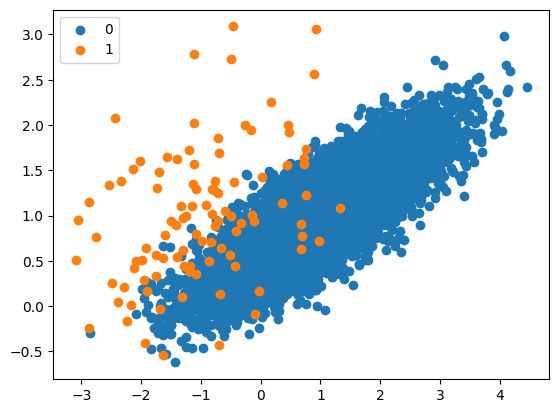

In [3]:
# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Select Examples to Keep

###Near Miss Undersampling

Counter({0: 100, 1: 100})


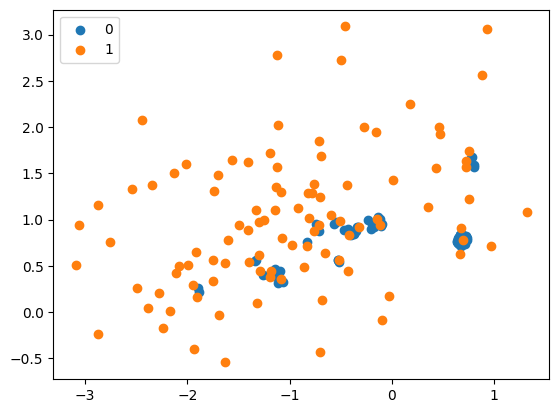

In [4]:
# Undersample imbalanced dataset with NearMiss-1

# define dataset
X, y = get_x_y()

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 100, 1: 100})


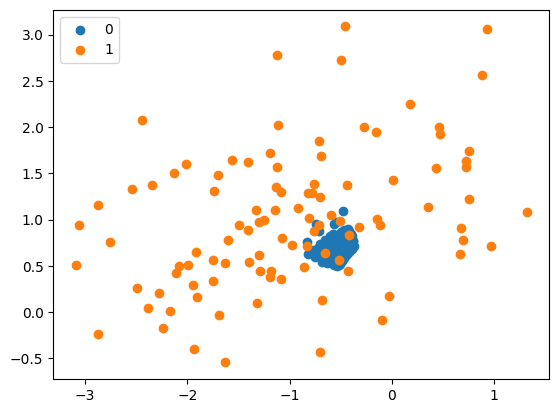

In [5]:
# Undersample imbalanced dataset with NearMiss-2

# define dataset
X, y = get_x_y()

# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 100, 1: 100})


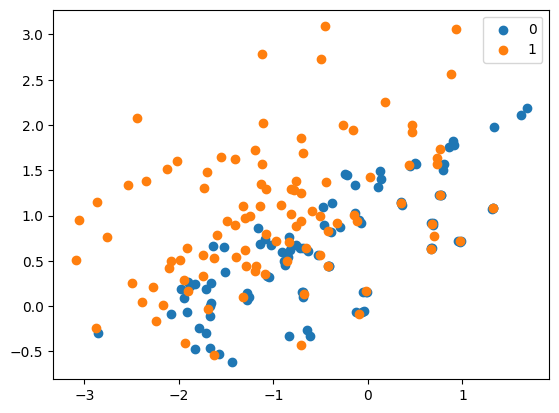

In [6]:
# Undersample imbalanced dataset with NearMiss-3

# define dataset
X, y = get_x_y()

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Condensed Nearest Neighbor Rule

Counter({0: 188, 1: 100})


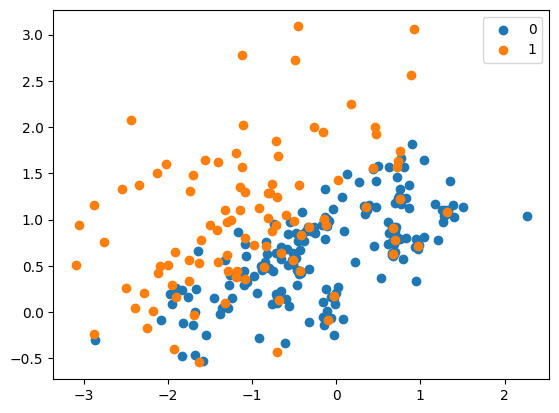

In [7]:
# undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule

# define dataset
X, y = get_x_y()

# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Select Examples to Delete

###Tomek Links

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


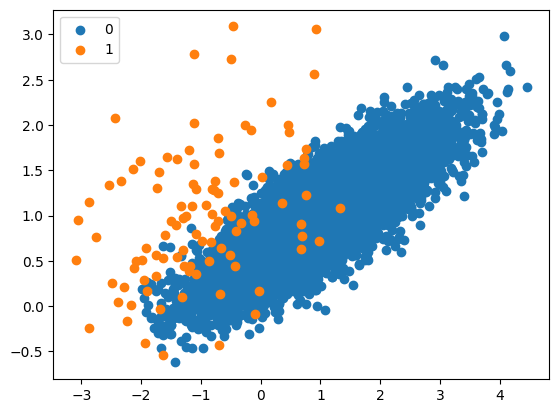

In [8]:
# undersample and plot imbalanced dataset with Tomek Links

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = TomekLinks()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Edited Nearest Neighbors Rule

Counter({0: 9900, 1: 100})
Counter({0: 9806, 1: 100})


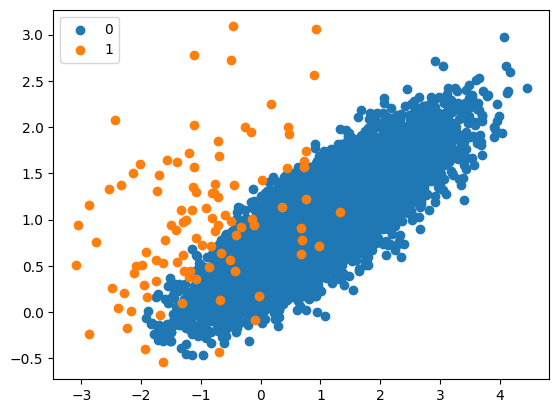

In [9]:
# undersample and plot imbalanced dataset with the Edited Nearest Neighbor rule

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = EditedNearestNeighbours(n_neighbors=3)
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Combinations of Keep and Delete Methods

###One-Sided Selection

Counter({0: 9900, 1: 100})
Counter({0: 956, 1: 100})


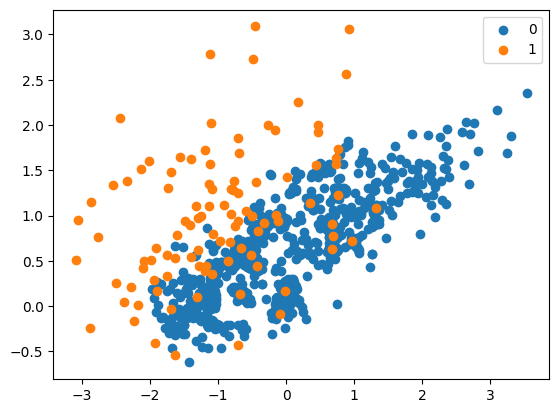

In [10]:
# undersample and plot imbalanced dataset with One-Sided Selection

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Neighborhood Cleaning Rule

Counter({0: 9900, 1: 100})
Counter({0: 9786, 1: 100})


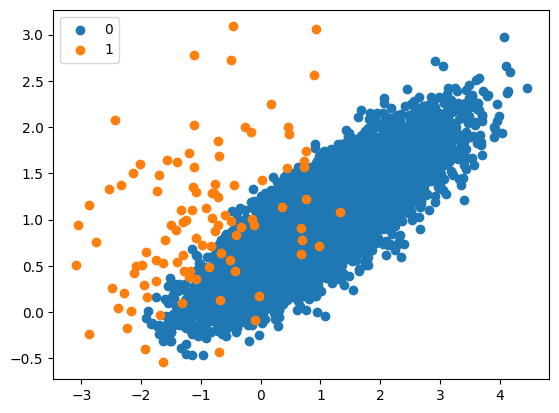

In [12]:
# undersample and plot imbalanced dataset with the neighborhood cleaning rule

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()